# **CS485 & CS584 - Homework 2**

In this Colab, we will write a full pipeline for **learning node embeddings**.
We will go through the following 3 steps.

To start, we will load a classic graph in network science, the [Davis Southern women social network](https://networkx.org/documentation/stable/reference/generated/networkx.generators.social.davis_southern_women_graph.html). We will explore multiple graph statistics for that graph.

We will then work together to transform the graph structure into a PyTorch tensor, so that we can perform machine learning over the graph.

Finally, we will finish an embedding algorithm on graphs: node2vec embedding model.

Now let's get started! This Colab should take 1-2 hours to complete.

**Note**: Make sure to **restart and run all** before submission, so that the intermediate variables / packages will carry over to the next cell

# 1 Graph Basics
To start, we will load a classic graph in network science, the [Davis Southern women social network](https://networkx.org/documentation/stable/reference/generated/networkx.generators.social.davis_southern_women_graph.html). We will explore multiple graph statistics for that graph.

You may find NetworkX provides useful [functions](https://networkx.org/documentation/stable/reference/functions.html) to help you solve the following problems.

## Setup
We will heavily use NetworkX in this Colab.

In [1]:
import networkx as nx

G = nx.davis_southern_women_graph()

# G is an undirected graph
type(G)

networkx.classes.graph.Graph

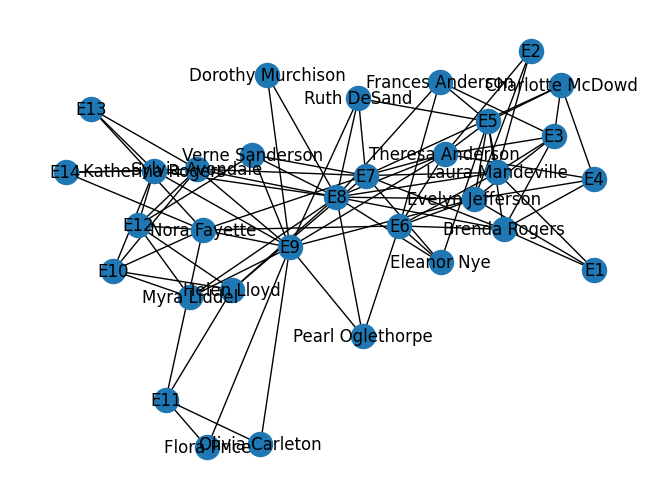

In [2]:
# Visualize the graph
nx.draw(G, with_labels = True)

## Question 1: What is the average degree of the Davis Southern women social network? (5 Points)

The **average degree** of an undirected graph is given by:
$$\bar{d} = \frac{2E}{N},$$
where $E$ is the number of edges, and $N$ is the number of nodes in the graph.


In [3]:
import networkx as nx
import numpy as np

def average_degree(num_edges, num_nodes):
  # TODO: Implement this function that takes number of edges
  # and number of nodes, and returns the average node degree of
  # the graph. Round the result to nearest integer (for example
  # 3.3 will be rounded to 3 and 3.7 will be rounded to 4)

  avg_degree = np.round(2 * num_edges / num_nodes)

  return avg_degree


Graph = nx.davis_southern_women_graph()

num_edges = Graph.number_of_edges()
num_nodes = Graph.number_of_nodes()
avg_degree = average_degree(num_edges, num_nodes)
print(f"Average degree of Davis Southern women social network is {avg_degree}")

Average degree of Davis Southern women social network is 6.0


## Question 2: What is the average path length of the Davis Southern women social network? (5 Points)

The **average path length** of an undirected graph is given by:
$$L = \frac{1}{\binom{N}{2}} \sum_{i < j} d(i, j),$$
where $N$ is the number of nodes, $\binom{N}{2}$ is the number of all possible node pairs, and $d(i, j)$ is the shortest path distance between nodes $i$ and $j$.



In [4]:
import networkx as nx

def average_path_length(G):
  # TODO: Implement this function to calculate
  # the average shortest path length in the graph.
  # Round the result to 2 decimal places.

  # Calculate the shortest path lengths between all pairs of nodes
  shortest_paths = dict(nx.all_pairs_shortest_path_length(G))
  total_path_length = 0
  num_pairs = 0

  for i in shortest_paths:
        for j in shortest_paths[i]:
            if i < j:  # Avoid double counting and self-loops
                total_path_length += shortest_paths[i][j]
                num_pairs += 1

  avg_path_length = total_path_length / num_pairs

  return round(avg_path_length, 2)


Graph = nx.davis_southern_women_graph()

avg_path_length = average_path_length(Graph)
print(f"Average shortest path length of the graph is {avg_path_length}")

Average shortest path length of the graph is 2.31


## Question 3: What is the Personalized PageRank value for node 0 (node with ID 0) after one iteration? (5 Points)
Page Rank measures importance of nodes in a graph using the link structure of the web. A “vote” from an important page is worth more. Specifically, if  a page $i$ with importance $r_i$ has $d_i$ out-links, then each link gets $\frac{r_i}{d_i}$ votes. Thus, the importance of a Page $j$, represented as $r_j$ is the sum of the votes on its in links.
$$r_j = \sum_{i \rightarrow j} \frac{r_i}{d_i}$$, where $d_i$ is the out degree of node $i$.

The PageRank algorithm (used by Google) outputs a probability distribution which represent the likelihood of a random surfer clicking on links will arrive at any particular page. At each time step, the random surfer has two options
- With prob. $\beta$, follow a link at random
- With prob. $1- \beta$, jump to a random page

The Personalized PageRank is a variation of the classic PageRank algorithm that emphasizes the importance of specific nodes in the graph. It measures the likelihood of a random surfer landing on a particular node, with a bias toward certain "personalized" nodes. Thus, the importance of a particular page is calculated with the following Personalized PageRank equation:
$$r_j = \sum_{i \rightarrow j} \beta \frac{r_i}{d_i} + (1 - \beta) \cdot p_j$$

Please complete the code block by implementing the above PageRank equation for node 0.

In [5]:
import networkx as nx

def one_iter_personalized_pagerank(G, beta, r0, p, node_id):
    # TODO: Computes the Personalized PageRank value for a specific node after one iteration.
    # Args:
    #     G (nx.Graph): Input graph.
    #     beta (float): Damping factor.
    #     r0 (dict): Initial PageRank values for all nodes.
    #     p (dict): Teleportation probabilities for all nodes.
    #     node_id (str): The node ID for which to calculate the Personalized PageRank value.
    # Returns:
    #     float: The Personalized PageRank value for the given node, rounded to 2 decimal places.

    # Computes the Personalized PageRank value for a specific node after one iteration.
    r1 = (1 - beta) * p[node_id]

    for neighbor in G.neighbors(node_id):  # Iterate over neighbors
        r1 += beta * (r0[neighbor] / G.degree[neighbor])

    return round(r1, 2)


Graph = nx.davis_southern_women_graph()

beta = 0.85
r0 = {node: 1 / Graph.number_of_nodes() for node in Graph.nodes()}
p = {node: 0.9 if node == "Evelyn" else 0.1 / (Graph.number_of_nodes() - 1) for node in Graph.nodes()}
node = "Evelyn Jefferson"
r1 = one_iter_personalized_pagerank(Graph, beta, r0, p, node)
print(f"The personalized PageRank value for node {node} after one iteration is {r1}")


The personalized PageRank value for node Evelyn Jefferson after one iteration is 0.04


## Question 4: What is the (raw) closeness centrality for node "Evelyn Jefferson"? (5 Points)

The **closeness centrality** of a node in a graph is defined as:
$$C(u) = \frac{N-1}{\sum_{v \neq u} d(u, v)},$$
where $N$ is the total number of nodes, $d(u, v)$ is the shortest path distance between nodes $u$ and $v$, and the summation runs over all nodes $v$ except $u$.


In [6]:
import networkx as nx

def closeness_centrality(G, node_id):
    ## Hint: You may find networkx's closeness_centrality function and use it directly.

    return nx.closeness_centrality(G, node_id)


Graph = nx.davis_southern_women_graph()

node = "Evelyn Jefferson"
closeness = closeness_centrality(Graph, node_id=node)
print(f"The node {node} has closeness centrality {closeness}")


The node Evelyn Jefferson has closeness centrality 0.5166666666666667


# 2 Graph to Tensor
We will then work together to transform the graph $G$ into a PyTorch tensor.

## Question 5: Get the edge list of the Davis Southern women social network and transform it into `torch.LongTensor`. (5 Points)

Recall HW1, we have already known for a graph in PyG with 3 nodes (0, 1, 2) and edges: (0 → 1), (1 → 2), and (2 → 0), the edge_index is a tensor in the `dtype` of `tensor.long`:
$$
\text{edge_index} =
\begin{bmatrix}
[0 & 1 & 2] \\
[1 & 2 & 0]
\end{bmatrix},
$$ where edge_index should be of shape (2, num_of_edges). When the graph is undirected, edge_index should contain the edges (1, 2) and (2, 1), which makes edge_index:
$$
\text{edge_index} =
\begin{bmatrix}
[0 & 1 & 2 & 1 & 2 & 0] \\
[1 & 2 & 0 & 0 & 1 & 2]
\end{bmatrix},
$$ where edge_index should now be of shape (2, 2$\times$num_of_edges).

In [7]:
import networkx as nx
import torch

def graph_to_edge_list(G):
    """Returns a list of edges where node labels are mapped to integers."""
    # Map node labels to integer indices
    node_mapping = {node: i for i, node in enumerate(G.nodes)}

    # Convert edges to integer indices
    edge_list = [(node_mapping[u], node_mapping[v]) for u, v in G.edges]
    return edge_list

def edge_list_to_tensor(edge_list):
    """Converts the edge list to a PyTorch tensor of shape [2, 2 * num_edges]."""
    edge_index = torch.tensor(edge_list, dtype=torch.long).T  # Shape [2, num_edges]

    # Since the graph is undirected, include reverse edges
    undirected_edges = torch.cat([edge_index, edge_index.flip(0)], dim=1)
    return undirected_edges


Graph = nx.davis_southern_women_graph()

pos_edge_list = graph_to_edge_list(Graph)
pos_edge_index = edge_list_to_tensor(pos_edge_list)
print(f"The edge_index tensor has shape {pos_edge_index.shape}")

The edge_index tensor has shape torch.Size([2, 178])


# 3 Node Embedding Learning

Finally, we will finish the first learning algorithm on graphs: Node2Vec embedding model. Here, we will work on [Karate Club graph](https://networkx.org/documentation/stable/reference/generated/networkx.generators.social.karate_club_graph.html). This graph has been preprocessed in both NetworkX and PyG.


Now let's simply reproduce the embedding model introduced by [Node2Vec paper](https://www-cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf) step by step!

## Setup

In [8]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

print(torch.__version__)

2.5.1+cu124


## Question 6: Implement Random Walks for Node2Vec. (10 Points) ##

First, let us Implement the random_walk function, which simulates a random walk starting from a given node in the Karate Club graph.

A **random walk** is a stochastic process where, starting from a given node, the next step is chosen randomly from the current node's neighbors. In the context of graphs, a random walk of length $l$ starting at node $u$ is represented as:

$$
\text{Walk}(u) = \{v_0, v_1, \dots, v_l\}
$$

where $v_0 = u$ and $v_{i+1}$ is selected uniformly or based on a probability distribution from the neighbors of $v_i$.

In **Node2Vec**, random walks are guided by two hyperparameters:
- **Return parameter ($p$)**: Controls the likelihood of revisiting the previous node.
- **In-out parameter ($q$)**: Controls the likelihood of exploring farther nodes.

These random walks simulate node contexts, which are then used in a skip-gram model to learn node embeddings, capturing both structural roles and neighborhood proximity in the graph.

Here, we skip parameter tuning and fix $p$ and $q$ to 1, resulting in a uniform random selection of nodes during the walk.


In [9]:
import networkx as nx
import random

def random_walk(G, start_node, walk_length):
    # TODO: Simulates a random walk starting from a given node.
    # Args:
    #     G (nx.Graph): Input graph.
    #     start_node (int): Starting node for the random walk.
    #     walk_length (int): Length of the random walk.
    # Returns:
    #     list: A list of nodes visited during the random walk.

    walk = [start_node]  # Initialize the walk with the start node

    current_node = start_node  # Start from the given node

    # Perform random walk for the given length
    for _ in range(walk_length - 1):  # Already have the start node, so walk_length - 1 steps
        neighbors = list(G.neighbors(current_node))  # Get neighbors of the current node
        next_node = random.choice(neighbors)  # Choose a random neighbor
        walk.append(next_node)  # Append to the walk
        current_node = next_node  # Move to the next node

    return walk

    return walk


# Load the Karate Club graph
Graph = nx.karate_club_graph()

# Test the function with node 0
start_node = 0
walk_length = 10
walk = random_walk(Graph, start_node, walk_length)
print(f"Random walk starting from node results a path in length of {len(walk)}")


Random walk starting from node results a path in length of 10


## Question 7: Generate Random Walks for All Nodes. (5 Points) ##

Now, let's generate multiple random walks for all nodes in a graph. This is a critical preprocessing step for Node2Vec. Each node initiates num_walks random walks, each of length walk_length. This ensures that sufficient node sequences are generated to provide a diverse and comprehensive dataset for training.

The resulting walks are then fed into a skip-gram model to learn meaningful node embeddings.

In [10]:
import networkx as nx
import random

def generate_random_walks(G, num_walks, walk_length):
    # TODO: Generates random walks for all nodes in the graph.

    walks = []

    for _ in range(num_walks):
        for node in G.nodes():
            walk = random_walk(G, node, walk_length)
            walks.append(walk)

    return walks


Graph = nx.karate_club_graph()

num_walks = 5
walk_length = 10
walks = generate_random_walks(Graph, num_walks, walk_length)
print(f"Generated {len(walks)} random walks.")


Generated 170 random walks.


## Quesion 8.1: Implement the train_skip_gram function to train a Skip-Gram model on the generated random walks. (5 Points) ##

After generating random walks, Node2Vec trains a Skip-Gram model to learn node embeddings. The Skip-Gram model aims to maximize the likelihood of predicting a node's neighbors given its embedding. Formally, the objective function is:

$$
\max_\Theta \sum_{u \in V} \sum_{v \in \mathcal{N}(u)} \log \, P(v \mid u; \Theta)
$$

where:
- $u$: Target node,
- $\mathcal{N}(u)$: Neighborhood nodes sampled from random walks,
- $P(v \mid u; \Theta)$: Probability of node $v$ being in the context of node $u$, parameterized by $\Theta$.

The probability is calculated as:

$$
P(v \mid u; \Theta) = \frac{\exp(\mathbf{z}_v^\top \mathbf{z}_u)}{\sum_{v' \in V} \exp(\mathbf{z}_{v'}^\top \mathbf{z}_u)}
$$

Here, $\mathbf{z}_u$ and $\mathbf{z}_v$ are the embeddings of nodes $u$ and $v$. This process enables the Skip-Gram model to learn embeddings that encode both structural and contextual information from the graph. More details can be found in the original paper of [Node2Vec](https://www-cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf).

Here we use the open source Word2Vec model to simply reproduce Node2Vec. You only need to input the generated random walks into the following pre-defined model. Parameter tuning is not required.


In [11]:
from gensim.models import Word2Vec

def train_skip_gram(walks, dimensions, window_size, epochs):
  # TODO: Trains a Skip-Gram model on the random walks.
  # Args:
  #     walks (list): List of random walks (each walk is a list of nodes).
  #     dimensions (int): Number of embedding dimensions.
  #     window_size (int): Window size for context in Skip-Gram.
  #     epochs (int): Number of training epochs.
  # Returns:
  #     Word2Vec: Trained Skip-Gram model.

  model = Word2Vec(
      sentences=walks,
      vector_size=dimensions,
      window=window_size,
      sg=1,
      workers=4,
      epochs=epochs
  )

  ############# Your code here ############

  #############################################

  return model

# Generate Random walks
num_walks = 5
walk_length = 10
walks = generate_random_walks(Graph, num_walks, walk_length)

# Train Node2Vec embeddings
dimensions = 16
window_size = 5
epochs = 50
node2vec_model = train_skip_gram(walks, dimensions, window_size, epochs)


In [12]:
print(f"Vocabulary size: {len(node2vec_model.wv.key_to_index)}")
print(f"Total words processed: {node2vec_model.corpus_total_words}")

Vocabulary size: 34
Total words processed: 1700


In [13]:
node_embedding = node2vec_model.wv[33]
print(f"Embedding for node 0: {node_embedding}")

Embedding for node 0: [ 0.08259713 -0.47342312  0.33851716  0.718707   -0.1627312   0.07698558
  0.8933409  -0.11246141 -0.647596   -0.2740552   0.04582443 -0.01187876
  0.01002157 -0.11847237 -0.36081207 -0.2770481 ]


##Question 8.2: Let's visualize the node embeddings we learned. Did we successfully classify different nodes (nodes with different labels)? If we reduce the number of training epoches from 500 to 50, can we still classify different node? You only need to answer Yes or No. (5 points)



Yes, A threshold of ~4.6 on the second dimension can classify the nodels. If we do 50 epochs, we can still do the classification, but this time we need to put a threshold on the first dimension. A threshold of ~-2.1 can classify the nodes very well. Each time I ran the code, the thresholds and dimensions changed a bit, but perfect classification was doable each time.

Answer:

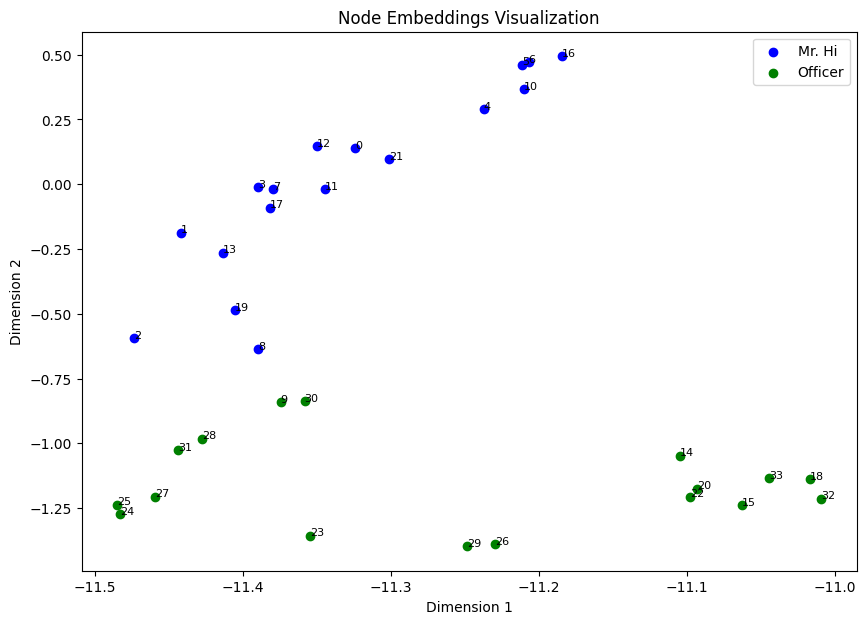

In [14]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

def visualize_embeddings_2d(model, G):
    # Extract embeddings and labels
    embeddings = []
    labels = []
    for node in G.nodes():
        embeddings.append(model.wv[node])
        labels.append(G.nodes[node]['club']) # Use 'club' attribute for labels

    embeddings = np.array(embeddings)
    tsne = TSNE(n_components=2, random_state=42)
    embeddings_2d = tsne.fit_transform(embeddings)

    # Plot embeddings
    plt.figure(figsize=(10, 7))
    for i, label in enumerate(labels):
        color = 'blue' if label == 'Mr. Hi' else 'green'
        plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], c=color, label=label if label not in labels[:i] else "")
        plt.text(embeddings_2d[i, 0], embeddings_2d[i, 1], s=str(list(G.nodes())[i]), fontsize=8)

    plt.title("Node Embeddings Visualization")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.legend(loc="best")
    plt.show()

# Visualize embeddings
visualize_embeddings_2d(node2vec_model, Graph)


##Go Further: How about training with GPU?

We now successfully reproduce the Node2Vec embedding, but we did not use GPU to accelerate this learning process.

Here, we demonstrate how to use PyG and PyTorch to accelerate the training process. By running the code, you will notice improved training speed due to the ability to perform batch training. Threfore, our subsequent homework will focus on PyTorch and PyG, exploring how to perform deep learning on graphs and introducing widely used graph deep learning models.

Note: You need to change the instance to T4 GPU to use cuda.

In [15]:
# Install torch geometric
!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-2.5.1+cu121.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-2.5.1+cu121.html
!pip install -q pyg-lib torch-cluster -f https://data.pyg.org/whl/torch-2.5.1+cu121.html
!pip install -q torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 103.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.4 MB/s eta 0:00:00


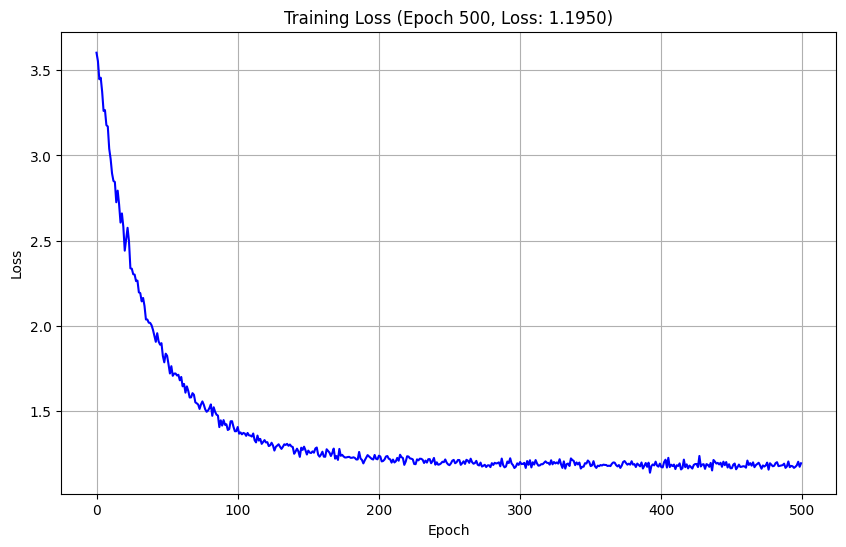

Node embeddings shape: (34, 16)


In [16]:
import torch
from torch_geometric.datasets import KarateClub
from torch_geometric.nn import Node2Vec
import matplotlib.pyplot as plt
from IPython import display


dataset = KarateClub()
data = dataset[0]
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = Node2Vec(data.edge_index, embedding_dim=16, walk_length=10,
                context_size=5, walks_per_node=10, p=1, q=1, sparse=True).to(device)
optimizer = torch.optim.SparseAdam(model.parameters(), lr=0.01)

# Train function use PyG with batch_size
def train():
    model.train()
    total_loss = 0
    # Specify batch_size in loader()
    for pos_rw, neg_rw in model.loader(batch_size=1024):
        optimizer.zero_grad()
        loss = model.loss(pos_rw.to(device), neg_rw.to(device))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(model.loader(batch_size=1024))

# Plot training process
losses = []
try:
    for epoch in range(500):
        loss = train()
        losses.append(loss)
        display.clear_output(wait=True)

        plt.figure(figsize=(10, 6))
        plt.plot(losses, 'b-')
        plt.grid(True)
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title(f'Training Loss (Epoch {epoch + 1}, Loss: {loss:.4f})')
        plt.show()

except KeyboardInterrupt:
    print("Training interrupted")

node2vec_embeddings = model.embedding.weight.data.cpu().numpy()
print("Node embeddings shape:", node2vec_embeddings.shape)

# Submission

When you submit your assignment, you will have to download this file as an `.ipynb` file.